# Overview

This a notebook that inspects the results of a WarpX simulation.

# Instruction

Enter the path of the data you wish to visualize below. Then execute the cells one by one, by selecting them with your mouse and typing `Shift + Enter`

In [2]:
# Import statements
import yt ; yt.funcs.mylog.setLevel(50)
import numpy as np
import scipy.constants as scc
from numpy import fft

In [5]:
np.seterr(divide = 'ignore') 
diag_name = 'plt_spidernet0720_' # E.g., diagnostics.diags_names = diag

In [6]:
j0 = 0; j1 = 2; dj = 1 # starting y index j0; ending y index j1; interval dj
tn0 = 1000; tn1 = 100000; dnt = 1000 # starting t index t0; ending t index t1; interval dt

for j in range(j0, j1, dj):
    filename = 'Ez_CPW_j%d.dat' %j
    f = open(filename, 'w') # writing mode
    np.savetxt(f, [])

### Color plot using yt ; Meanwhile, save data using numpy 

In [7]:
j0 = 0; j1 = 2; dj = 1 # starting y index j0; ending y index j1; interval dj
tn0 = 1000; tn1 = 100000; dnt = 1000 # starting t index t0; ending t index t1; interval dt

dt = 2.948161989e-15

for iteration in range (tn0, tn1, dnt) : # time step
    plotfile = './diags/{}{:05d}'.format(diag_name, iteration)
    ds = yt.load( plotfile ) # Load the plotfile
    #ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
    ad0 = ds.covering_grid(level=0, left_edge=[ 0., -1.375e-2, 0.], dims=[ 2, 2, 2]) 
    y_array = ad0['y'].to_ndarray()
    Ez_array = ad0['Ez'].to_ndarray()
    for j in range(j0, j1, dj):
        data = np.column_stack((dt * iteration, Ez_array[1,j,1]))
        filename = 'Ez_CPW_j%d.dat' %j
        f = open(filename, 'a') # writing mode
        np.savetxt(f, data)
        f.close()
        # plot
        if j == j1+dj: # don't want to plot...
                sl = yt.SlicePlot(ds, 1, field, origin='native', aspect=200./1) # Create a sliceplot object
                sl.set_zlim('Ez', -1e0, 1e0)
                sl.set_log('Ez', False)
                sl._setup_plots()
                sl.set_font({'family': 'sans-serif', 'size': 20})
                sl.show() # Show the plot
                sl.save(str(iteration).zfill(5)+'.png')
        # print(k, iteration)
        
ds.field_list # Print all available quantities


[('boxlib', 'Bx'),
 ('boxlib', 'By'),
 ('boxlib', 'Bz'),
 ('boxlib', 'Ex'),
 ('boxlib', 'Ey'),
 ('boxlib', 'Ez')]

Text(0.5, 0, 'time in second')

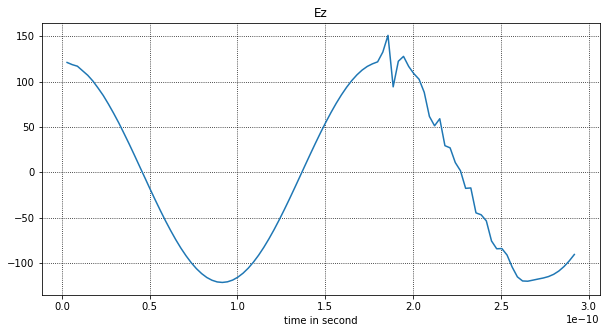

In [9]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 5

j = 0
data = np.loadtxt('./Ez_CPW_j%d.dat' %j) 
nt = data[:, 0]
Ez = data[:, 1]
plt.plot(nt, Ez)
plt.grid(True, color='k', linestyle=':')
plt.title("Ez")
plt.xlabel("time in second")

### FFT in time domain

In [19]:
import math
Nt = math.floor((tn1-tn0)/dnt)    # Number of data points in input
dt_scaled = dt*dnt    # Sampling period (in meters)

Fk = fft.fft(Ez)/Nt    # Fourier coefficients (divided by n)

nu = fft.fftfreq(Nt,dt)  # Natural frequencies

Fk= fft.fftshift(Fk)   # Shift zero freq to center
nu = fft.fftshift(nu)   # Shift zero freq to center

print(Nt)
print(dt_scaled)

99
2.9481619889999997e-12


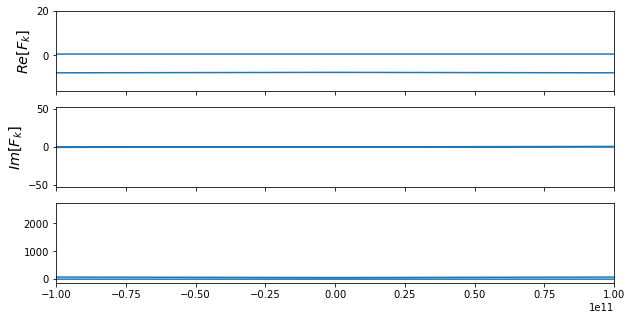

In [17]:
Fk= fft.fftshift(Fk)   # Shift zero freq to center
nu = fft.fftshift(nu)   # Shift zero freq to center

f, ax = plt.subplots(3,1,sharex=True)
ax[0].plot(nu, np.real(Fk))         # Plot Cosine terms
ax[0].set_ylabel(r'$Re[F_k]$', size = 'x-large')
ax[1].plot(nu, np.imag(Fk))         # Plot Sine terms
ax[1].set_ylabel(r'$Im[F_k]$', size = 'x-large')
ax[2].plot(nu, np.absolute(Fk)**2)  # Plot spectral power
# ax[2].set_ylabel(r'$\vertF_k\vert^2$', size = 'x-large')
# ax[2].set_xlabel(r'$\widetilde{\nu}$', size = 'x-large')
# plt.xlim((-10e9,10e9))
plt.show()